In [3]:
import pandas as pd


df = pd.read_csv("data/diabetes_data_preprocessed.csv")
df.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_diagnoses,metformin,repaglinide,...,level1_diag1_4.0,level1_diag1_5.0,level1_diag1_6.0,level1_diag1_7.0,level1_diag1_8.0,AfricanAmerican,Asian,Caucasian,Hispanic,Other
0,149190,55629189,15,-0.444493,0.803985,-0.816942,0.270682,0.881753,0,0,...,False,False,False,False,False,False,False,True,False,False
1,64410,86047875,25,-0.783787,-1.601808,2.027000,-0.334765,-0.704810,0,0,...,False,False,False,False,False,True,False,False,False,False
2,500364,82442376,35,-0.783787,0.052174,-0.248154,0.028503,-0.175956,0,0,...,False,False,False,False,False,False,False,True,False,False
3,16680,42519267,45,-1.123081,0.403019,-0.816942,-0.940212,-1.233664,0,0,...,False,False,False,False,True,False,False,True,False,False
4,35754,82637451,55,-0.444493,-0.599394,2.595789,0.028503,0.881753,0,0,...,False,False,False,False,False,False,False,True,False,False


<Axes: xlabel='readmitted', ylabel='count'>

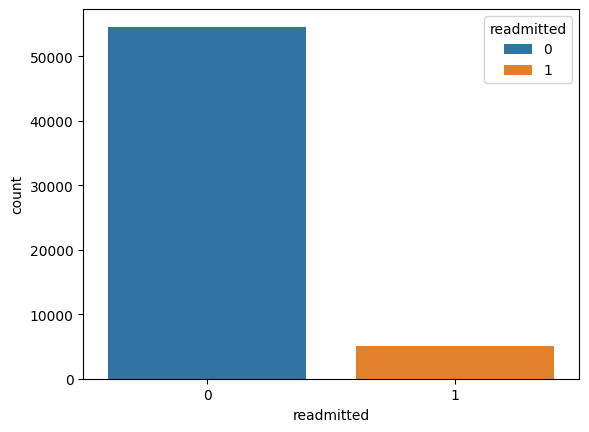

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = df, x = 'readmitted', hue='readmitted')

In [12]:
feature_set = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide',
                 'pioglitazone', 'rosiglitazone', 'acarbose', 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 'admission_source_id_4',
                 'admission_source_id_7', 'admission_source_id_9', 'max_glu_serum_0.0', 'max_glu_serum_1.0', 'A1Cresult_0',
                 'A1Cresult_1', 'num_medications|time_in_hospital', 'num_medications|num_procedures',
                 'time_in_hospital|num_lab_procedures', 'num_medications|num_lab_procedures', 'num_medications|number_diagnoses',
                 'age|number_diagnoses', 'change|num_medications', 'number_diagnoses|time_in_hospital',
                 'num_medications|numchange', 'level1_diag1_1.0', 'level1_diag1_2.0', 'level1_diag1_3.0', 'level1_diag1_4.0',
                 'level1_diag1_5.0','level1_diag1_6.0', 'level1_diag1_7.0', 'level1_diag1_8.0']

In [13]:
X = df[feature_set]
y = df['readmitted']

In [14]:
df['readmitted'].value_counts()

readmitted
0    54599
1     5070
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logit = LogisticRegression(fit_intercept=True, penalty='l2', max_iter=1000)
logit.fit(X_train, y_train)

e:\readmission_prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [19]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(logit_pred, name='Predicted'), margins=True)


Predicted,0,All
Actual,,
0,2133,2133
1,229,229
All,2362,2362


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(f"Accuracy: {accuracy_score(y_test, logit_pred)}")
print(f"Precision: {precision_score(y_test, logit_pred)}")
print(f"Recall: {recall_score(y_test, logit_pred)}")

Accuracy: 0.9151164739400034
Precision: 0.0
Recall: 0.0


e:\readmission_prediction\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(f'Original Dataset Shape {Counter(y_train)}')
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_resample(X_train, y_train)
print(f'New dataset shape {Counter(train_output_new)}')

Original Dataset Shape Counter({0: 43678, 1: 4057})
New dataset shape Counter({0: 43678, 1: 43678})


In [27]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size = 0.20, random_state=0)
logit.fit(X_train, y_train)

e:\readmission_prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [29]:
logit_pred = logit.predict(X_test)
pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(logit_pred, name='Predicted'), margins=True)

Predicted,0,1,All
Actual,,,
0,1657,1506,3163
1,150,138,288
All,1807,1644,3451


In [30]:
print(f"Accuracy: {accuracy_score(y_test, logit_pred)}")
print(f"Precision: {precision_score(y_test, logit_pred)}")
print(f"Recall: {recall_score(y_test, logit_pred)}")

Accuracy: 0.856856684981685
Precision: 0.8704202270865036
Recall: 0.8421291053227633


# Decision Tree

In [35]:
feature_set_no_int = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log1p', 
                 'number_emergency_log1p', 'number_inpatient_log1p', 'number_diagnoses', 'metformin', 
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'AfricanAmerican', 'Asian', 'Caucasian', 
                 'Hispanic', 'Other', 'gender_1', 
                 'admission_type_id_3', 'admission_type_id_5', 
                 'discharge_disposition_id_2', 'discharge_disposition_id_7', 
                 'discharge_disposition_id_10', 'discharge_disposition_id_18', 
                 'admission_source_id_4', 'admission_source_id_7', 
                 'admission_source_id_9', 'max_glu_serum_0.0', 
                 'max_glu_serum_1.0', 'A1Cresult_0', 'A1Cresult_1', 
                 'level1_diag1_1.0',
                 'level1_diag1_2.0',
                 'level1_diag1_3.0',
                 'level1_diag1_4.0',
                 'level1_diag1_5.0',
                 'level1_diag1_6.0',
                 'level1_diag1_7.0',
                 'level1_diag1_8.0']

In [36]:
X = df[feature_set_no_int]
y = df['readmitted']
df['readmitted'].value_counts()

readmitted
0    54599
1     5070
Name: count, dtype: int64

In [ ]:
print(f"Original Dataset Shape: {Counter(y)}")
# smt = SMOTE(random_state=20)
# train_input_new, train_output_new = smt.fit_resample(X, y)
print(f"New Dataset Shape {Counter(train_output_new)}")


Original Dataset Shape: Counter({0: 54599, 1: 5070})
New Dataset Shape Counter({0: 43678, 1: 43678})


In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=28, criterion='entropy', min_samples_split=10)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=28, min_samples_split=10)

In [43]:
dtree_pred = dtree.predict(X_test)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(dtree_pred, name = 'Predicted'), margins=True)

Predicted,0,1,All
Actual,,,
0,1594,1569,3163
1,149,139,288
All,1743,1708,3451


In [44]:
print(f"Accuracy: {accuracy_score(y_test, dtree_pred)}")
print(f"Precision: {precision_score(y_test, dtree_pred)}")
print(f"Recall: {recall_score(y_test, dtree_pred)}")

Accuracy: 0.892342032967033
Precision: 0.896044682548729
Recall: 0.8902604756511892


                                Feature  Importance
23                            Caucasian    0.031856
46               change|num_medications    0.032317
26                             gender_1    0.032713
42  time_in_hospital|num_lab_procedures    0.033746
21                      AfricanAmerican    0.034555
49                     level1_diag1_1.0    0.039240
43   num_medications|num_lab_procedures    0.039874
0                                   age    0.045038
6                number_inpatient_log1p    0.050836
29           discharge_disposition_id_2    0.090785


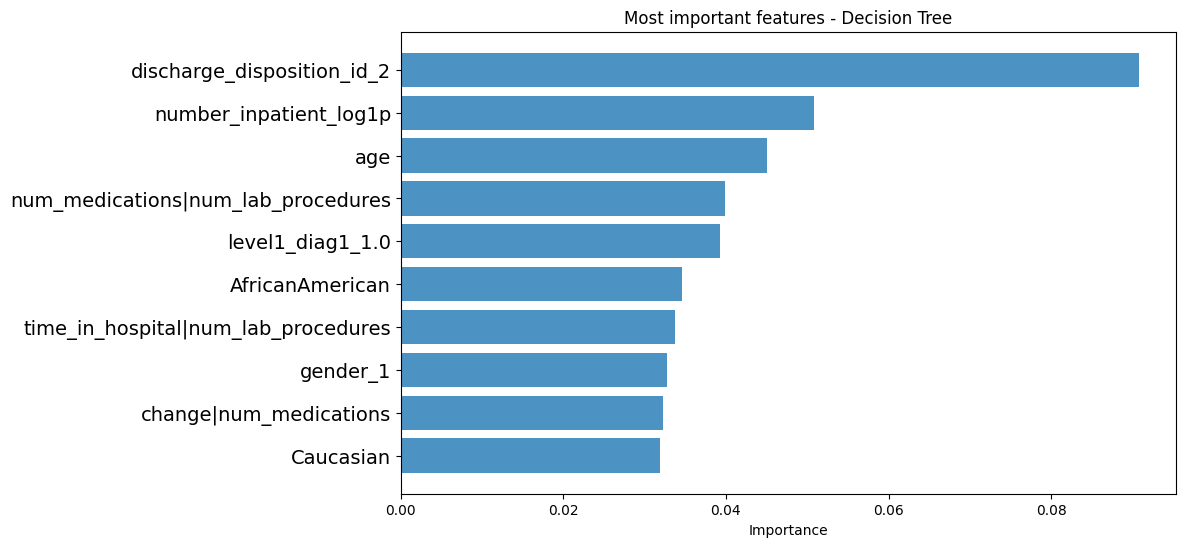

In [45]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

# RANDOM FOREST

In [48]:
X = df[feature_set_no_int]
y = df['readmitted']

print(f'Originalo dataset shape {Counter(y)}')
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
print(f"New dataset shape {Counter(train_output_new)}")
train_output_new = pd.DataFrame(train_input_new, columns=list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Originalo dataset shape Counter({0: 54599, 1: 5070})
New dataset shape Counter({0: 54599, 1: 54599})


In [49]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier(n_estimators=10, max_depth = 25, criterion = 'gini', min_samples_split=10)
rm.fit(X_train, y_train)

ValueError: Unknown label type: continuous-multioutput. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.